# LSTM metrics
Model: GluonTS LSTM

Dataset: electricity, exchange rate, solar_nips, traffic_nips

In this notebook we investigate the difference in evaulation scores when the same model is trained and tested multiple times with the same settings but different random seeds. We also explore if the best and worst seeds are consistently good or bad across all timeseries.

In [1]:
import matplotlib.pyplot as plt

from src.metrics import *

In [2]:
metric = ["MAPE"]
n = 10

### Exchange rate

In [3]:
experiment_path = "/datadrive/experiments/lstm/exchange_rate/1A"
exp = load_data(experiment_path)

len(exp)

100

In [4]:
exp[0].head()

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,0.000799,0.720916,31.091047,1.036368,0.008791,2.733546,0.023168,0.022807,NaN,109.341831,1.275439,0.933333,0.720916,0.933333,0.166392,0.933333
1,1.0,0.000050,0.162927,47.975410,1.599180,0.016455,0.330040,0.003384,0.003391,NaN,13.201619,0.098498,0.400000,0.162927,0.400000,0.227356,0.400000
2,2.0,0.003376,1.603725,30.113565,1.003786,0.006396,8.358577,0.053365,0.051736,NaN,334.343048,2.886705,1.000000,1.603725,1.000000,0.320745,1.000000
3,3.0,0.002038,1.161405,31.995962,1.066532,0.009511,4.070548,0.036472,0.035594,NaN,162.821947,2.055338,0.900000,1.161405,0.900000,0.267473,0.900000
4,4.0,0.000534,0.621815,4.801961,0.160065,0.000207,100.054439,0.129435,0.119882,NaN,4002.177958,1.119268,1.000000,0.621815,1.000000,0.124363,1.000000


In [5]:
report_experiment_results(exp)

MSE SCORES
	All seeds:
		Mean: 0.004784353246975729
		Std: 0.005500031306501802
		Variance: 0.07416219593904837

	Worst seeds:
		Mean: 0.01692194677889347
		Std: 0.005534772295504808
		Variance: 0.074396051466465

	Best seeds:
		Mean: 0.0002824902185238898
		Std: 8.410325244767591e-05
		Variance: 0.009170782752335072


MASE SCORES
	All seeds:
		Mean: 14.540794600073484
		Std: 7.525588182376077
		Variance: 2.743280551160613

	Worst seeds:
		Mean: 30.26171875
		Std: 5.423729419708252
		Variance: 2.328890085220337

	Best seeds:
		Mean: 5.001887321472168
		Std: 1.1087250709533691
		Variance: 1.0529601573944092


MAPE SCORES
	All seeds:
		Mean: 0.06960373475013892
		Std: 0.033754680872174474
		Variance: 0.18372446998746378

	Worst seeds:
		Mean: 0.13423383235931396
		Std: 0.02710004150867462
		Variance: 0.16462090611457825

	Best seeds:
		Mean: 0.02322276309132576
		Std: 0.006141651421785355
		Variance: 0.07836868613958359




In [6]:
exp_array = calculate_timeseries_means(exp, metric, 8)
exp_array.shape

(100, 8, 1)

In [7]:
exp[0].head(10)

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,0.000799,0.720916,31.091047,1.036368,0.008791,2.733546,0.023168,0.022807,NaN,109.341831,1.275439,0.933333,0.720916,0.933333,0.166392,0.933333
8,0.0,0.000586,0.622536,31.412418,1.047081,0.008773,2.365452,0.019808,0.019545,NaN,94.618069,1.120565,1.000000,0.622536,1.000000,0.124507,1.000000
16,0.0,0.000269,0.464295,31.442495,1.048083,0.008757,1.767250,0.014760,0.014639,NaN,70.690012,0.835732,1.000000,0.464295,1.000000,0.092859,1.000000
24,0.0,0.000973,0.874963,31.072994,1.035766,0.008744,3.335464,0.028220,0.027772,NaN,133.418553,1.574933,1.000000,0.874963,1.000000,0.174993,1.000000
32,0.0,0.000080,0.235777,30.949823,1.031661,0.008724,0.900892,0.007629,0.007618,NaN,36.035692,0.266007,0.500000,0.235777,0.500000,0.205548,0.500000
1,1.0,0.000050,0.162927,47.975410,1.599180,0.016455,0.330040,0.003384,0.003391,NaN,13.201619,0.098498,0.400000,0.162927,0.400000,0.227356,0.400000
9,1.0,0.001585,1.065089,48.259655,1.608655,0.016415,2.162818,0.022011,0.022319,NaN,86.512735,0.213018,0.000000,1.065089,0.000000,1.917161,0.000000
17,1.0,0.000492,0.598502,48.184841,1.606161,0.016369,1.218739,0.012427,0.012523,NaN,48.749554,0.127548,0.066667,0.598502,0.066667,1.069457,0.066667
25,1.0,0.000701,0.700694,46.918461,1.563949,0.016344,1.429079,0.014961,0.015107,NaN,57.163155,0.140139,0.000000,0.700694,0.000000,1.261249,0.000000


(array([0., 0., 6., 6., 1., 3., 0., 0., 1., 0., 6., 0., 0., 0., 0., 0., 8.,
        0., 2., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 5., 0., 0., 0.,
        2., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 2., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 0., 6., 0., 6., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 3., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 6.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 4., 0., 0., 0., 0., 1.]),
 array([16, 62,  2,  3, 60, 10, 84, 30, 94, 72]),
 array([8., 6., 6., 6., 6., 6., 6., 5., 4., 3.]))

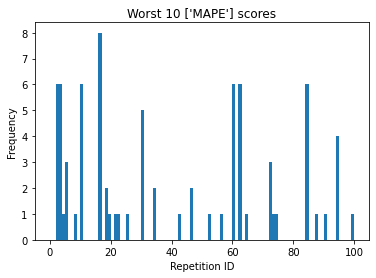

In [8]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, exp_array.shape[0])
plt.title(f"Worst {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([1., 0., 0., 0., 0., 0., 0., 0., 5., 0., 0., 0., 0., 6., 1., 6., 0.,
        0., 0., 0., 4., 0., 0., 0., 4., 0., 1., 0., 3., 0., 0., 1., 1., 0.,
        0., 3., 3., 0., 0., 0., 1., 0., 1., 0., 3., 2., 0., 5., 6., 0., 1.,
        0., 0., 0., 0., 0., 0., 1., 0., 3., 0., 2., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 1., 3., 0., 0., 3., 2., 0.,
        0., 0., 0., 2., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.]),
 array([15, 48, 13,  8, 47, 20, 24, 28, 82, 59]),
 array([6., 6., 6., 5., 5., 4., 4., 3., 3., 3.]))

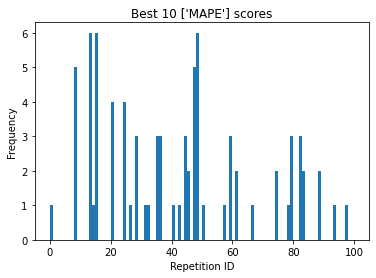

In [9]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, exp_array.shape[0])
plt.title(f"Best {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]

### Traffic nips

In [10]:
experiment_path = "/datadrive/experiments/lstm/traffic_nips/1A"
exp = load_data(experiment_path)

len(exp)

100

In [11]:
report_experiment_results(exp)

MSE SCORES
	All seeds:
		Mean: 0.0004861571668934455
		Std: 3.667756024081412e-05
		Variance: 0.00605620014867525

	Worst seeds:
		Mean: 0.0005721564521081746
		Std: 2.5251583792851306e-05
		Variance: 0.00502509530633688

	Best seeds:
		Mean: 0.00044391336268745363
		Std: 2.6110030830750475e-06
		Variance: 0.0016158598009496927


MASE SCORES
	All seeds:
		Mean: 0.6195244139904222
		Std: 0.08246337132329712
		Variance: 0.28716436290615366

	Worst seeds:
		Mean: 0.8216441869735718
		Std: 0.06245730072259903
		Variance: 0.24991458654403687

	Best seeds:
		Mean: 0.5410637855529785
		Std: 0.004598013125360012
		Variance: 0.06780865043401718


MAPE SCORES
	All seeds:
		Mean: 0.18170909674070646
		Std: 0.022775598944087476
		Variance: 0.15091586710511085

	Worst seeds:
		Mean: 0.23499147593975067
		Std: 0.013354133814573288
		Variance: 0.11556008458137512

	Best seeds:
		Mean: 0.1575045883655548
		Std: 0.0019415320130065084
		Variance: 0.044062819331884384




In [12]:
exp_array = calculate_timeseries_means(exp, metric, 963)
exp_array.shape

(100, 963, 1)

(array([ 12., 230., 178., 203.,   9.,  87.,   4.,   3.,   1.,   1.,   3.,
          1.,   0.,   3.,   0.,   2.,   1.,   7.,   7.,   2.,   0.,   0.,
          1.,   1.,   0., 578., 206.,   0.,   0.,   2.,   0.,   1.,  89.,
        747., 570.,   1.,   7., 293.,   5.,   8.,   2.,   0.,  66.,  39.,
          9., 225.,   0., 252.,   0.,   1.,   4., 634., 194.,   2.,  22.,
          2.,   3.,   0.,   2.,   4., 611.,  65.,  12.,  19.,   0.,   0.,
        417.,   6.,   1.,  24., 466., 233., 113.,   3.,   9.,  56., 498.,
        325.,   8.,   1.,   0.,  22.,   0.,   0.,  11.,   3.,   3., 790.,
          0.,   2.,   6.,  16.,   6., 718., 105.,  53., 298.,   3.,   3.,
          0.]),
 array([87, 33, 93, 51, 60, 25, 34, 76, 70, 66]),
 array([790., 747., 718., 634., 611., 578., 570., 498., 466., 417.]))

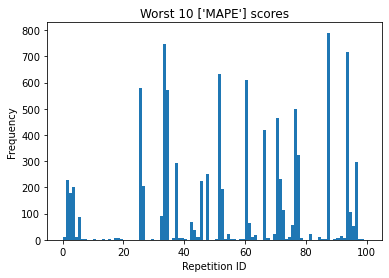

In [13]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, exp_array.shape[0])
plt.title(f"Worst {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([ 16.,   4.,  49.,  12.,   0.,   3., 169., 119., 223., 168.,  99.,
        168., 141.,  98.,  70., 128., 101.,  35.,  29., 142., 145., 252.,
        187., 248., 306.,   0.,   2., 380., 159.,  92., 357., 139.,   6.,
          6.,   8., 354.,   7.,   9.,  40., 218., 125., 358.,   8.,  27.,
         21.,  45.,  13.,  23., 226.,  34.,   6.,   1.,   1.,  23.,  54.,
         19., 152., 313.,  90.,  48.,   0.,   1.,  71.,  31., 186., 136.,
          9.,   8., 169.,  47.,   0.,   1.,  11.,  50., 196., 110.,   5.,
          8.,  81., 138., 382.,  22., 171., 352.,  15., 156., 182.,   1.,
          8.,  31.,  64.,  32.,  76.,   4.,   7.,   3.,  10., 190., 103.,
        287.]),
 array([80, 27, 41, 30, 35, 83, 57, 24, 99, 21]),
 array([382., 380., 358., 357., 354., 352., 313., 306., 287., 252.]))

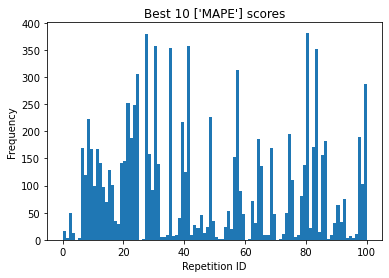

In [14]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, exp_array.shape[0])
plt.title(f"Best {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]

### Solar nips

In [15]:
experiment_path = "/datadrive/experiments/lstm/solar_nips/1A"
exp = load_data(experiment_path)

len(exp)

100

In [16]:
report_experiment_results(exp)

MSE SCORES
	All seeds:
		Mean: 1870.4452507470755
		Std: 240.00493911735447
		Variance: 15.492092793336685

	Worst seeds:
		Mean: 2341.857421875
		Std: 130.98045349121094
		Variance: 11.444668769836426

	Best seeds:
		Mean: 1508.0184326171875
		Std: 62.39781188964844
		Variance: 7.899228572845459


MASE SCORES
	All seeds:
		Mean: 1.5645376919323908
		Std: 0.0996926923343586
		Variance: 0.31574149606024005

	Worst seeds:
		Mean: 1.7551243305206299
		Std: 0.040152519941329956
		Variance: 0.20038093626499176

	Best seeds:
		Mean: 1.405925989151001
		Std: 0.021585434675216675
		Variance: 0.14691981673240662


MAPE SCORES
	All seeds:
		Mean: 0.41250874186081576
		Std: 0.02746608250385974
		Variance: 0.16572894286713996

	Worst seeds:
		Mean: 0.46739643812179565
		Std: 0.02249486744403839
		Variance: 0.14998288452625275

	Best seeds:
		Mean: 0.37847164273262024
		Std: 0.003642249619588256
		Variance: 0.06035105139017105




In [17]:
exp_array = calculate_timeseries_means(exp, metric, 137)
exp_array.shape

(100, 137, 1)

(array([ 0., 20.,  3.,  0., 18.,  4.,  6., 11.,  0., 14.,  8., 27., 17.,
         2.,  1., 14., 29.,  2.,  4., 30.,  0., 22., 45., 66.,  9., 10.,
        12., 16.,  4.,  0.,  4., 28.,  5.,  0., 38., 22.,  1., 18., 34.,
        16., 61., 15.,  1.,  0., 19., 32., 18.,  0., 11., 10.,  0., 74.,
        10., 13.,  7.,  0.,  0.,  4.,  8., 34.,  1., 22., 22.,  0., 26.,
        14.,  7.,  3.,  3.,  1.,  8.,  1.,  7., 39.,  4., 30., 23., 51.,
        18., 38., 20.,  3.,  4.,  2.,  5.,  1.,  0., 20., 21.,  1.,  0.,
         2.,  0., 15., 40.,  1., 11.,  0.,  6., 23.]),
 array([51, 23, 40, 77, 22, 94, 73, 34, 79, 59]),
 array([74., 66., 61., 51., 45., 40., 39., 38., 38., 34.]))

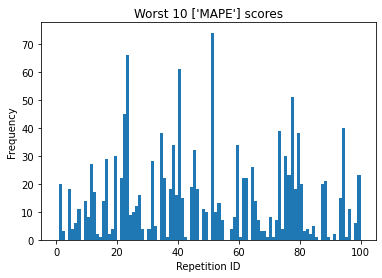

In [18]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, exp_array.shape[0])
plt.title(f"Worst {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([11., 16., 23., 17., 13.,  7., 24., 16.,  8.,  5.,  7.,  1., 17.,
        27., 20., 18., 14., 11., 18., 12.,  7., 44.,  4.,  7.,  9.,  1.,
         8.,  2., 20.,  8., 11.,  7.,  6., 20., 53.,  7., 16., 55.,  2.,
         5.,  0., 29.,  6., 14., 11.,  2.,  4., 12.,  5.,  2., 13.,  1.,
        16.,  4., 16., 18., 10., 25.,  8.,  5., 11.,  1.,  7.,  6., 46.,
        20., 11., 15., 13.,  1., 11., 17., 59.,  3., 11., 12., 13.,  6.,
         6., 19., 33.,  4., 11.,  5.,  7., 14., 33., 73.,  3., 10.,  9.,
         5.,  4., 21.,  1., 11., 26., 25.,  3.,  6.]),
 array([87, 72, 37, 34, 64, 21, 80, 86, 41, 13]),
 array([73., 59., 55., 53., 46., 44., 33., 33., 29., 27.]))

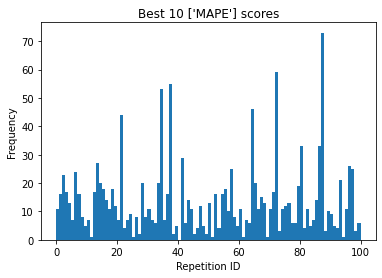

In [19]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, exp_array.shape[0])
plt.title(f"Best {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]

### Electricity

In [20]:
experiment_path = "/datadrive/experiments/lstm/electricity/1B"
exp = load_data(experiment_path)

len(exp)

100

In [21]:
report_experiment_results(exp)

MSE SCORES
	All seeds:
		Mean: 13898916.874850707
		Std: 6529811.319756898
		Variance: 2555.3495494270246

	Worst seeds:
		Mean: 27392924.0
		Std: 5890758.5
		Variance: 2427.08837890625

	Best seeds:
		Mean: 5378180.5
		Std: 815338.5625
		Variance: 902.9609985351562


MASE SCORES
	All seeds:
		Mean: 1.294908038229506
		Std: 0.3950875531346853
		Variance: 0.6285599041735682

	Worst seeds:
		Mean: 2.250211238861084
		Std: 0.32201623916625977
		Variance: 0.5674647688865662

	Best seeds:
		Mean: 0.9031314849853516
		Std: 0.017658432945609093
		Variance: 0.13288503885269165


MAPE SCORES
	All seeds:
		Mean: 0.1359210615395706
		Std: 0.02988831547183847
		Variance: 0.17288237467086826

	Worst seeds:
		Mean: 0.21178419888019562
		Std: 0.021801525726914406
		Variance: 0.14765340089797974

	Best seeds:
		Mean: 0.10817922651767731
		Std: 0.0030214074067771435
		Variance: 0.054967328906059265




In [22]:
exp_array = calculate_timeseries_means(exp, metric, 321)
exp_array.shape

(100, 321, 1)

(array([277.,   0.,   2.,  63.,   2.,  10.,   1.,   1.,   4.,   5.,   0.,
          0.,   0.,  52.,  34.,   0.,   1.,  23.,   2.,   8.,   0.,   0.,
         65.,   2.,  35.,   3.,  18.,   1.,  23.,   4.,   4., 153.,   2.,
          2.,   1.,   1., 263.,   1.,   8.,   1.,   1.,   1.,   3.,   0.,
          0.,   1.,   0.,  10.,   0.,  25.,   2.,   4.,   6., 106.,   2.,
          0.,   3.,   0., 172.,   1., 151., 246.,   0.,   0., 231., 291.,
          0.,  17.,   0.,   0.,  32.,   0., 266.,   0.,  16., 233.,   3.,
          0., 119.,   4.,   1.,   1.,   4.,  24.,   0.,   0.,   0.,   2.,
          0.,  70.,   0.,   2.,   2.,   0.,   0.,   0.,   0.,  63.,  21.,
          2.]),
 array([65,  0, 72, 36, 61, 75, 64, 58, 31, 60]),
 array([291., 277., 266., 263., 246., 233., 231., 172., 153., 151.]))

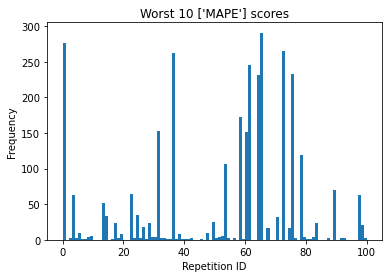

In [23]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, exp_array.shape[0])
plt.title(f"Worst {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([  1.,  20.,   7.,   7.,  30.,  39.,  35.,  22.,  29.,  84.,  33.,
         23.,  22.,  16.,  28., 111.,  15.,  39.,  23.,   5.,  37.,  22.,
         14.,  56.,  11., 133.,   9.,  40.,  12.,  26., 124.,  13.,  12.,
         12.,  15., 166.,   3.,   2.,  76.,  97.,  46.,  82., 118.,  11.,
          8.,  16.,  47.,   9.,   9.,   6.,   6.,  22.,   5.,  27.,  93.,
         23.,   4.,  12.,   3.,   7.,  10.,   4.,   8.,  16.,   8.,   3.,
         68.,  15.,  16.,  12.,  14.,  22.,   5.,   9.,   8.,   2.,   6.,
         76.,   3.,  14.,  16.,   8., 108.,  43.,  34.,   1.,  90.,  32.,
        189.,  29.,  25.,  32.,  11.,  28.,  42., 138.,   8.,   1.,   6.,
         27.]),
 array([88, 35, 95, 25, 30, 42, 15, 82, 39, 54]),
 array([189., 166., 138., 133., 124., 118., 111., 108.,  97.,  93.]))

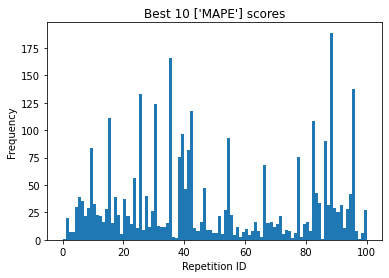

In [24]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, exp_array.shape[0])
plt.title(f"Best {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]